In [107]:
import pandas as pd 

In [108]:
df = pd.read_csv('C:\Github\Credit_risk_analysis_with_ExplainableAI\data\processed\cleaned_loan_data.csv')

In [109]:
df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [110]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,59000.0,17.0,29800.0,16.02,1,0.59,1,3,0,0,1,0,0,0,0,1,0
1,21.0,9600.0,5.0,1000.0,11.14,0,0.10,0,2,0,1,0,0,1,0,0,0,0
2,25.0,9600.0,1.0,5500.0,12.87,1,0.57,0,3,0,0,0,0,0,0,1,0,0
3,23.0,65500.0,4.0,29800.0,15.23,1,0.53,0,2,0,0,1,0,0,0,1,0,0
4,24.0,54400.0,8.0,29800.0,14.27,1,0.55,1,4,0,0,1,0,0,0,1,0,0


In [111]:
df['loan_status'].value_counts()

0    25327
1     7089
Name: loan_status, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 


In [113]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Ensure labels are encoded as integers starting from 0
y_train_encoded = y_train.astype('category').cat.codes
y_test_encoded = y_test.astype('category').cat.codes

# Calculate the scale_pos_weight ratio
ratio = y_train_encoded.value_counts()[0] / y_train_encoded.value_counts()[1]

# Instantiate the XGBoost model with scale_pos_weight and use_label_encoder=False
xgb_model = xgb.XGBClassifier(scale_pos_weight=ratio, random_state=42, use_label_encoder=False)

# Fit the model
xgb_model.fit(X_train, y_train_encoded)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test_encoded, y_pred_xgb))


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[14:16:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5073
           1       0.81      0.79      0.80      1411

    accuracy                           0.92      6484
   macro avg       0.88      0.87      0.87      6484
weighted avg       0.91      0.92      0.91      6484



[I 2025-01-31 14:16:49,595] A new study created in memory with name: no-name-59a97760-e546-4b1c-97ac-a9502ec62478


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0

Best Hyperparameters:  {'n_estimators': 191, 'max_depth': 8, 'learning_rate': 0.1885650928576218, 'subsample': 0.8868046785121395, 'colsample_bytree': 0.6507049704976599, 'gamma': 0.4721812948086728, 'reg_alpha': 0.9691235903364304, 'reg_lambda': 0.15635565568967771}
[14:17:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


              precision    recall  f1-score   support

           0       0.86      0.92      0.89       145
           1       0.92      0.86      0.89       155

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



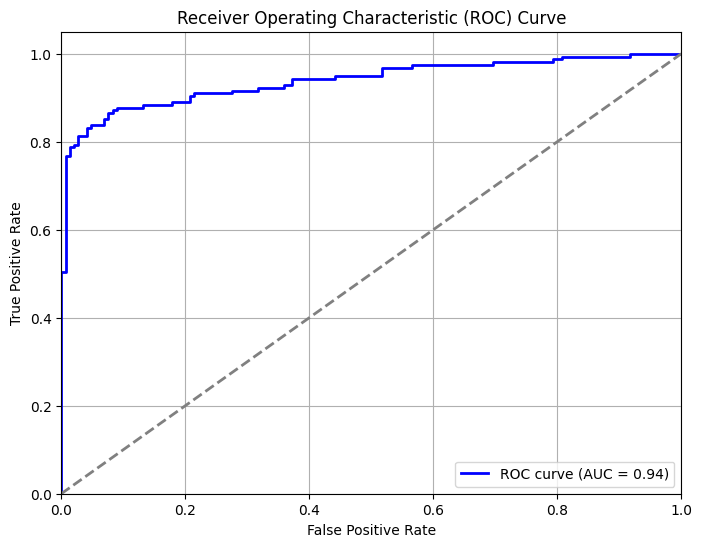

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

# Load your data (replace this with your actual data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to tune
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 0.01, 1),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.01, 1),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.01, 1),
        'eval_metric': 'logloss',
        'use_label_encoder': False
    }

    # Initialize XGBClassifier with the trial parameters
    model = XGBClassifier(**param, random_state=42)

    # Fit the model
    model.fit(X_train, y_train)

    # Evaluate accuracy on the test set
    y_pred = model.predict(X_test)
    accuracy = (y_pred == y_test).mean()

    # Return the accuracy for Optuna to optimize
    return accuracy

# Create the study
study = optuna.create_study(direction='maximize')

# Start the hyperparameter optimization with 100 trials
study.optimize(objective, n_trials=100)

# Print the best hyperparameters found
print("Best Hyperparameters: ", study.best_params)

# Train the final model with the best hyperparameters
best_model = XGBClassifier(**study.best_params)
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

# Get the predicted probabilities for the positive class (1)
y_pred_prob_best = best_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_best)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob_best)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [117]:
xgb_model.save_model(r'C:\Github\Credit_risk_analysis_with_ExplainableAI\models\xgb_model.json')


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 56-57: truncated \xXX escape (1551992296.py, line 1)